# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:

Last Name: 

Student ID: 

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [22]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from nltk import corpus
from matplotlib import pyplot as plt
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
import urllib
from lxml import html
import requests
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import requests_cache
requests_cache.install_cache('demo_cache')
import math
import re
from functools import reduce
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
def Find_Link(url, page = 1):
    """
    This function gets the links of the given url of the aggie and also gets the page number
    Arg: the line (url) and the number of page (page)
    Return: article links 
    """
    
    response = requests.get(url + "page/" + str(page))

    soup = BeautifulSoup(response.text, "lxml")
    list = soup.find_all('h2')
    return [l.a.get('href') for l in list]

In [4]:
Find_Link('http://theaggie.org/campus/')

['https://theaggie.org/2018/03/04/uc-davis-student-protester-arrested-yiannopoulos-talk-last-year-awaits-trial/',
 'https://theaggie.org/2018/03/01/executive-ticket-candidates-claim-biases-non-asucd-affiliated-individuals/',
 'https://theaggie.org/2018/03/01/happiness-campaign-strives-less-stress-joy/',
 'https://theaggie.org/2018/02/27/senator-term-review-yajaira-ramirez-sigala/',
 'https://theaggie.org/2018/02/27/calpirgs-winter-quarter-pledge-drives/',
 'https://theaggie.org/2018/02/26/asucd-election-results-announced-2/',
 'https://theaggie.org/2018/02/26/sexual-violence-prevention-response-board-created/',
 'https://theaggie.org/2018/02/26/memoriam-markos-huerta/',
 'https://theaggie.org/2018/02/25/traditional-chinese-music-classes-offered-uc-davis-confucius-institute/',
 'https://theaggie.org/2018/02/25/last-week-senate-25-7/',
 'https://theaggie.org/2018/02/22/asucd-executive-tickets-hold-coho-debate/',
 'https://theaggie.org/2018/02/22/mental-health-town-hall-erupts-protest/',


__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [5]:
import re
def Extract_article(url):
    """
    This function is to extract the title, text, author for the given url
    Args: website link(url)
    Return: dictionary of the author, link, text and title (dict)
    """
    txt = []
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    data = soup.find_all("div",attrs={"itemprop": "articleBody"})[0].find_all("p")
    a = data[-1]
    del data[-1]   
    for link in data:
        txt.append(link.text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22,0x2026:0x20 })) #https://stackoverflow.com/questions/816285/where-is-pythons-best-ascii-for-this-unicode-database
    if "\n" not in a:
        author = a.text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    else:
        re = a.text.split("\n")
        txt.append((re[0]))
        author = re[1].translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    text = reduce(lambda x,y: x+y,txt)
    title = soup.find_all("h1",attrs={"class": "entry-title"})[0].text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    dict = {'text':text,'url' : url,"author":author,"title":title}
    return dict

In [6]:
Extract_article("https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/")

{'author': 'Written By: Bianca Antunez \xa0—\xa0city@theaggie.org',
 'text': 'Davis residents create financial model to make city\'s financial state more transparentTo increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort w

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [67]:
def get(category):
    """
    This function creates a dataframe with 60 cols for each category 
    Arg: for this question: campus/city (category)
    Result: dataframe(data)
    """
    links = [Find_Link("http://theaggie.org/" + category +"/", x) for x in range(1,5)]
    data = pd.concat([pd.DataFrame(Extract_article(i)  for i in list) for list in links], ignore_index=True)
    data['category'] = category
    return data

campus = get("campus")
city = get("city")
data = campus
data = data.append(city).reset_index(drop = True)
data

,author,text,title,url,category
0,Written by: Aaron Liss — campus@theaggie.org,Noah Benham faces four chargesOn the night of ...,UC Davis student protester arrested at Yiannop...,https://theaggie.org/2018/03/04/uc-davis-stude...,campus
1,A previous version of this article stated that...,"ACT slate candidates, disqualified Golden Slat...",Executive ticket candidates claim biases again...,https://theaggie.org/2018/03/01/executive-tick...,campus
2,,The Happiness Campaign seeks to reduce anxiety...,"Happiness Campaign strives for less stress, mo...",https://theaggie.org/2018/03/01/happiness-camp...,campus
3,Written by: Sabrina Habchi — campus@theaggie.org,Ramirez Sigala's performance as ASUCD senatorA...,Senator Term Review: Yajaira Ramirez Sigala,https://theaggie.org/2018/02/27/senator-term-r...,campus
4,,History behind CALPIRGWho are the people with ...,CALPIRG's Winter Quarter pledge drives,https://theaggie.org/2018/02/27/calpirgs-winte...,campus
5,,"President Michael Gofman, Vice President Shani...",ASUCD election results announced,https://theaggie.org/2018/02/26/asucd-election...,campus
6,,Systemwide student advisory board formed to in...,Sexual Violence Prevention and Response Board ...,https://theaggie.org/2018/02/26/sexual-violenc...,campus
7,Written by: Jacqueline Moore — campus@theaggie...,"UC Davis freshman remembered for empathy, kind...",In Memoriam: Markos Huerta,https://theaggie.org/2018/02/26/memoriam-marko...,campus
8,,"Confucius Institute seeks to help students, co...",Traditional Chinese music classes to be offere...,https://theaggie.org/2018/02/25/traditional-ch...,campus
9,Written by: Elizabeth Mercado — campus@theaggi...,No decision on severing ties with Tapingo with...,Last week in Senate,https://theaggie.org/2018/02/25/last-week-sena...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [8]:
##What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

In [9]:
import string

def split(texts):
    """
    This function splits text into words in an article
    Input: rows(row)
    Output: data 
    """
    thetext = texts[1].lower()
    for punct in string.punctuation:
        thetext = thetext.replace(punct,"")
    words = thetext.split()
    data2 = pd.DataFrame({'word': words})
    data2['title'] = texts[2]
    data2['category'] = texts[4]
    data2['url'] = texts[3]
    return data2

all_words = pd.concat([split(data.loc[i]) for i in range(0, 120)])
all_words

,word,title,category,url
0,noah,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
1,benham,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
2,faces,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
3,four,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
4,chargeson,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
5,the,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
6,night,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
7,of,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
8,feb,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...
9,13,UC Davis student protester arrested at Yiannop...,campus,https://theaggie.org/2018/03/04/uc-davis-stude...


In [10]:
#import nltk
#nltk.download()

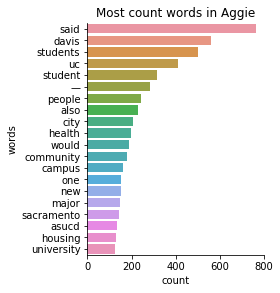

In [11]:
stop = set(stopwords.words('english'))

def getwordCount(Count):
    """
    This function is to get the top 20 frequently appeared words that are not stopwords
    Input: wordCount (dataframe)
    Output: mostCover (dataframe)
    """
    Count_data = pd.DataFrame(Count['word'].value_counts())
    Count_data['words'] = Count_data.index
    Count_data.columns = ['count','words']
    Count_data = Count_data.loc[[i not in stop for i in Count_data.words], :]
    return Count_data

Aggieword = getwordCount(all_words)
Aggiewords2 = Aggieword[0:20]
sns.factorplot("count", "words", data = Aggiewords2, kind = "bar")
plt.title('Most count words in Aggie')
plt.show()

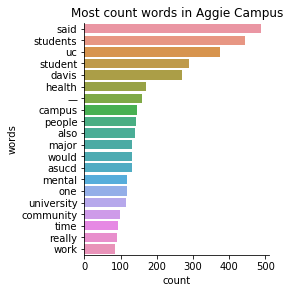

In [12]:
Campus = all_words.loc[all_words['category'] == 'campus']
Campus_wordCount = getwordCount(Campus)
Campus_word = Campus_wordCount[0:20]
sns.factorplot("count", "words", data = Campus_word, kind = "bar")
plt.title('Most count words in Aggie Campus')
plt.show()

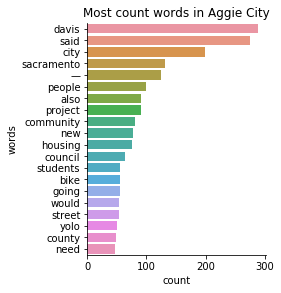

In [13]:
City = all_words.loc[all_words['category'] == 'city']
City_wordCount = getwordCount(City)
City_word = City_wordCount[0:20]
sns.factorplot("count", "words", data = City_word, kind = "bar")
plt.title('Most count words in Aggie City')
plt.show()

In [14]:
#2 What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [16]:
data['text']

0      Noah Benham faces four chargesOn the night of ...
1      ACT slate candidates, disqualified Golden Slat...
2      The Happiness Campaign seeks to reduce anxiety...
3      Ramirez Sigala's performance as ASUCD senatorA...
4      History behind CALPIRGWho are the people with ...
5      President Michael Gofman, Vice President Shani...
6      Systemwide student advisory board formed to in...
7      UC Davis freshman remembered for empathy, kind...
8      Confucius Institute seeks to help students, co...
9      No decision on severing ties with Tapingo with...
10     Candidates discuss how to end toxicity within ...
11     Students demand promised counselors, question ...
12     Candidates promoted platforms, few students st...
13     Executive ticket challenges alleged bias withi...
14     Vice President Adilla Jamaludin criticizes sta...
15     Beyond the Statistics joins formerly incarcera...
16     Preview of UAW, UCOP negotiationsThe UC Studen...
17     Rodriguez sought to incr

In [31]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [46]:
txt = []
for i in data["text"]:
    txt.append(i)
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm="l2")
tfs_text = vectorizer.fit_transform(txt)
norm = tfs_text.dot(tfs_text.T)
norm = norm.toarray()

In [49]:
for i in range(1,121):
    for x in range(0,i):
        norm[i-1,x] = -1
norm

array([[-1.        ,  0.19461121,  0.21371137, ...,  0.13176927,
         0.21451373,  0.17280045],
       [-1.        , -1.        ,  0.2178361 , ...,  0.13591842,
         0.23964261,  0.17305816],
       [-1.        , -1.        , -1.        , ...,  0.13915866,
         0.2656617 ,  0.19490951],
       ..., 
       [-1.        , -1.        , -1.        , ..., -1.        ,
         0.34694989,  0.1256554 ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        ,  0.1930979 ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [56]:
indices =  np.argpartition(norm.flatten(), -3)[-3:]

topThree = np.vstack(np.unravel_index(indices, norm.shape)).T
topThree

array([[11, 36],
       [46, 56],
       [ 1, 13]])

In [65]:
print(data["title"].iloc[topThree[0]])
print(data["title"].iloc[topThree[1]])
print(data["title"].iloc[topThree[2]])

11            Mental Health Town Hall erupts in protest
36    Internal audit reveals steep decline in counse...
Name: title, dtype: object
46    700 students to attend 24-hour HackDavis hacka...
56    700 students to attend 24-hour HackDavis hacka...
Name: title, dtype: object
1     Executive ticket candidates claim biases again...
13    Adam Hatefi and Shreya Deshpande disqualified ...
Name: title, dtype: object


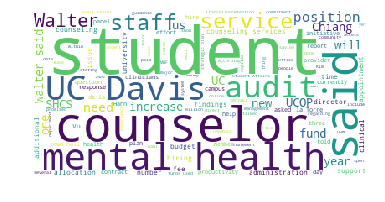

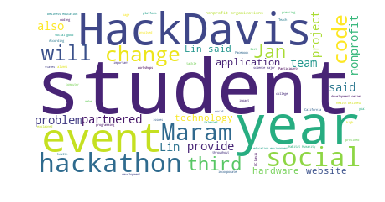

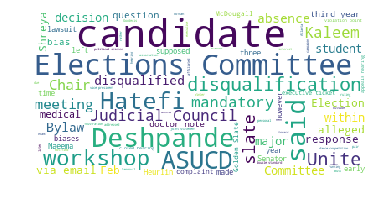

In [62]:
def find_image(txt_1,txt_2):
    """
    Get the word cloud image
    Input: two txts
    Output: The plot
    """
    pair = []
    pair.extend([txt_1,txt_2])
    pair_1 = reduce(lambda x,y: x+y,pair)
    wc = WordCloud(background_color="white", max_words=200)
    wc.generate(pair_1)
    return wc
plt.imshow(find_image(data["text"].iloc[topThree[0][0]],data["text"].iloc[topThree[0][1]]))
plt.axis("off")
plt.show()
plt.imshow(find_image(data["text"].iloc[topThree[1][0]],data["text"].iloc[topThree[1][1]]))
plt.axis("off")
plt.show()
plt.imshow(find_image(data["text"].iloc[topThree[2][0]],data["text"].iloc[topThree[2][1]]))
plt.axis("off")
plt.show()

In [77]:
def compare_data(df, wordCount, tt, count):
    """
    This function is to compare the pair data frame and get the common words
    Input: df (dataframe), wordCount(dataframe), tt(array of pair), count(integer)
    Output: compare(dataframe)
    """
    title1 = df.loc[tt[0]].title
    title2 = df.loc[tt[1]].title
    
    print("No." + str(count) + " pair:")
    print(title1 + "\n" + title2 + "\n\n")
    
    compare = wordCount.loc[(wordCount['title'] == title1) | (wordCount['title'] == title2)]
    return compare

frame = []
count = 0
for i in topThree:
    count += 1
    df1 = compare_data(data, all_words, i, count)
    frame.append(df1)
frame

No.1 pair:
Mental Health Town Hall erupts in protest
Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds


No.2 pair:
700 students to attend 24-hour HackDavis hackathon on Jan. 20
700 students to attend 24-hour HackDavis hackathon on Jan. 20


No.3 pair:
Executive ticket candidates claim biases against non-ASUCD affiliated individuals
Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop




[                   word                                              title  \
 0              students          Mental Health Town Hall erupts in protest   
 1                demand          Mental Health Town Hall erupts in protest   
 2              promised          Mental Health Town Hall erupts in protest   
 3            counselors          Mental Health Town Hall erupts in protest   
 4              question          Mental Health Town Hall erupts in protest   
 5            allocation          Mental Health Town Hall erupts in protest   
 6                    of          Mental Health Town Hall erupts in protest   
 7                mental          Mental Health Town Hall erupts in protest   
 8                health          Mental Health Town Hall erupts in protest   
 9                 feeon          Mental Health Town Hall erupts in protest   
 10                  feb          Mental Health Town Hall erupts in protest   
 11                   12          Mental Health Town

In [79]:
freq_word = [getwordCount(frame[i]) for i in range(0,3)]
freq_word

[                   count              words
 said                  54               said
 students              52           students
 student               46            student
 uc                    45                 uc
 health                44             health
 mental                38             mental
 davis                 35              davis
 walter                33             walter
 counselors            31         counselors
 audit                 30              audit
 services              30           services
 counseling            27         counseling
 staff                 23              staff
 positions             19          positions
 —                     19                  —
 shcs                  19               shcs
 funds                 19              funds
 12                    17                 12
 one                   15                one
 new                   14                new
 ucop                  13               ucop
 us       

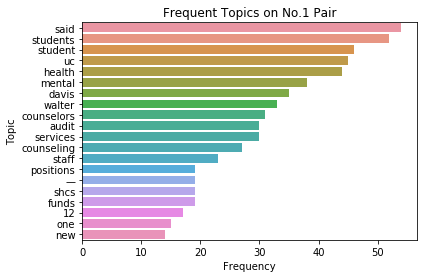

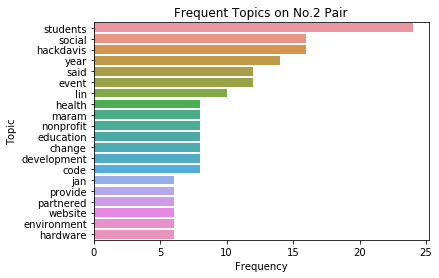

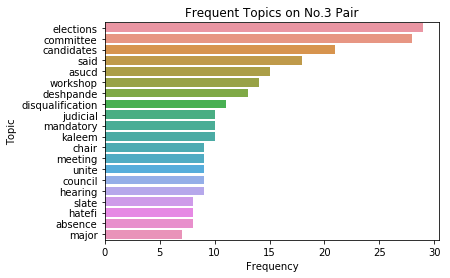

In [80]:
freq_word = [getwordCount(frame[i]) for i in range(0,3)]

def draw(count):
    """
    This function is to draw the bar chart of common words of the pairs using sns
    Input: count(integer)
    Output: pictures shown
    """    
    sns.barplot('count', 'words', data = freq_word[count].head(20))
    plt.title('Frequent Topics on No.' + str(count+1) + ' Pair')
    plt.xlabel('Frequency')
    plt.ylabel('Topic')
    plt.show()
    
for x in range(0,3):
    draw(x)

In [81]:
##3

##I don't think this corpus is a good representative of the Aggie because we only scrape the most recent news on the Aggie. They are the events that happend in the recent weeks and are not representative of the Aggie. According to our output in 1.4.2, the words such as "davis", "said", "uc", "students" appeared a lot of times, but they are not meaningful because this website is target to uc davis students. The words that really involve specific topics are "president" which appears 88 times, "health" which appears 87 times, and "food" which appears 86 times. Thus topics of uc davis president, student health, and food are supportted in this corpus.

##I don't think the corpus represente the Aggie. First of all, there are lots of category in The Aggie except campus and city, such as sports, technology. Moreover, we only get the first four pages of the website, and the website update everyday, so it is impossible for us to get all the information about The Aggie form the corpus. Still, we find out that the author number is limited, so we still can conclude that the corpus cannot represente the Aggie,

This corpus implies that the website often talks about the news of student, UC Davis, education and major. We also find out that the if two articles are similar, these tow articles often discuss the same topic. The corpus also support the idea that the city articles are quite similar to the campus, and they both foucus on the life of the students and some interesting event happened in davis.